In [146]:
%matplotlib inline

from numpy import linspace, abs, log10, var
import matplotlib.pyplot as plt
import peakutils
from scipy.fftpack import fftfreq
import pandas
from IPython.display import display, Audio
import time

SAMPLING_RATE = 100000
CENTER = 35000

In [147]:
# Plot FFT frequency domain
def plot_output(fft_output, thres=0.95, logscale=False):
    output = fft_output.copy()
    plt.figure(figsize=(8, 4), dpi=80)
    freq = linspace(0, SAMPLING_RATE/2.0, len(output))
        
    if logscale:
        output = 20 * log10(output)
        plt.ylabel("Magnitude(dB)")
    else:
        plt.ylabel("Magnitude")

    center = int(len(output) * CENTER / (SAMPLING_RATE / 2))
    output[:center-100] = 0
    output.loc[center+100:] = 0
    peaks = peakutils.indexes(output, thres=thres)
    plt.plot(freq, output)
    
    plt.xlabel("Frequency(Hz)")
    plt.title("Frequency domain")

    if len(peaks) == 2:
            print("***** Detected! *****")
    elif len(peaks) == 1:
            print("***** Detected! *****") 
    # if len(peaks) > 0 and len(peaks) < 20:
        #print("Frequencies at peaks: {} Hz".format(freq[peaks]))
        #print("Magnitude at peaks: {}".format(output[peaks]))
        #print("Number of peaks: {}".format(len(output[peaks])))

***** Detected! *****


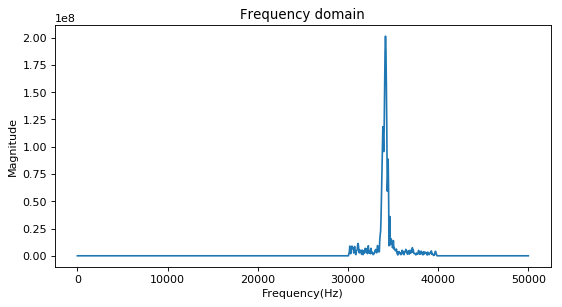

In [229]:
df = pandas.read_csv("./out.fft")
plot_output(df['Magnitude'], logscale=False, thres=0.7)